In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.metrics import sensitivity_specificity_support
pd.set_option("max_columns",500)
pd.set_option("max_rows",500)

In [2]:
#loading the dataset
df=pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#lets check the shape of df
df.shape

(99999, 226)

# 1. Data WalkThrough  

## a) Handling Missing Values

In [5]:
# Lets keep the missing values threshold as 50%
missing_threshold=50

In [6]:
# lets check for null %
null_df=pd.DataFrame(100*df.isnull().sum()/df.shape[0]).reset_index()
null_df.columns=['features','null_%']

In [7]:
null_df

,features,null_%
0,mobile_number,0.000000
1,circle_id,0.000000
2,loc_og_t2o_mou,1.018010
3,std_og_t2o_mou,1.018010
4,loc_ic_t2o_mou,1.018010
5,last_date_of_month_6,0.000000
6,last_date_of_month_7,0.601006
7,last_date_of_month_8,1.100011
8,last_date_of_month_9,1.659017
9,arpu_6,0.000000


#### <u>Observation</u> : The columns like count_rech ,av_rech_amt have a high amount of null values (more than 70%). We should not directly drop these variables , lets investigate it further .

In [8]:
#For example , if the date of last recharge and total_rech are  both missing. , 
#then it certainly implies that the customer did no recharge that month .

# lets try doing it for the 6th month , lets view all the recharge data columns where date_of_last_rech_data_6 and total_rech_data_6 are both not present

df[(df['date_of_last_rech_data_6'].isnull()&df['total_rech_data_6'].isnull())][['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6']]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN


#### <u>Observation : </u> we stand corrected , hence imputing zero for the recharge columns

In [9]:
#gathering all the recharge columns
rech_cols = [col for col in df.columns if 'rech' in col and 'date' not in col]

In [10]:
# selecting the reharge columns with high missing values
zero_impute_columns=[]
for col in rech_cols:
    if null_df[null_df['features']==col]['null_%'].values[0] > missing_threshold:
        zero_impute_columns.append(col)

In [11]:
zero_impute_columns

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [12]:
# filling missing values with zero
for col in zero_impute_columns:
    df[col].fillna(0,inplace=True)


In [13]:
# checking the null % again
null_df=pd.DataFrame(100*df.isnull().sum()/df.shape[0]).reset_index()
null_df.columns=['features','null_%']

In [14]:
null_df

,features,null_%
0,mobile_number,0.000000
1,circle_id,0.000000
2,loc_og_t2o_mou,1.018010
3,std_og_t2o_mou,1.018010
4,loc_ic_t2o_mou,1.018010
5,last_date_of_month_6,0.000000
6,last_date_of_month_7,0.601006
7,last_date_of_month_8,1.100011
8,last_date_of_month_9,1.659017
9,arpu_6,0.000000


#### <u>Observation </u> :  The columns like fb_user is a categorical column that has a high missing value % , lets try to create a new category for missing values

In [15]:
# creating a new class for missing values
col_prefix='fb_user_'
for i in range(6,10):
    df[col_prefix+str(i)].fillna(-1,inplace=True)

In [16]:
# checking the null% again
null_df=pd.DataFrame(100*df.isnull().sum()/df.shape[0]).reset_index()
null_df.columns=['features','null_%']

In [17]:
null_df

,features,null_%
0,mobile_number,0.000000
1,circle_id,0.000000
2,loc_og_t2o_mou,1.018010
3,std_og_t2o_mou,1.018010
4,loc_ic_t2o_mou,1.018010
5,last_date_of_month_6,0.000000
6,last_date_of_month_7,0.601006
7,last_date_of_month_8,1.100011
8,last_date_of_month_9,1.659017
9,arpu_6,0.000000


In [18]:
df.shape

(99999, 226)

In [19]:
# dropping  un-necessary columns

#id columns 
id_cols=['mobile_number','circle_id']

#date columns
date_cols=[col for col in df.columns if 'date' in col]

df.drop(id_cols,inplace=True,axis=1)

df.drop(date_cols,inplace=True,axis=1)


In [20]:
# dropping the columns which has missing value > 50%
cols_to_drop=null_df[null_df['null_%']>50]['features']

for col in cols_to_drop:
    try:
        df.drop(col,axis=1,inplace=True)
    except:
        pass

In [21]:
# imputing the remaining missing values using fancy imputer
df_imputed = IterativeImputer().fit_transform(df)


In [22]:
new_df=pd.DataFrame(df_imputed,columns=df.columns)


In [23]:
new_df.head()

In [24]:
# new_df.to_csv("telecom_churn_imputed.csv",index=False)

In [25]:
# final_df=pd.read_csv("telecom_churn_imputed.csv")
final_df=new_df.copy()

In [26]:
final_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-96.982933,-82.344404,0.00,-107.647445,144.530062,133.159088,0.00,113.392071,27.889473,11.765569,0.00,7.979269,31.023096,11.791739,0.00,1.232406,-99.840953,-117.319248,0.00,-120.110742,93.344258,91.394738,0.00,90.447817,3.749781,3.799963,0.00,3.663032,2.501123,-2.499278,0.00,-0.121345,-2.833474,-22.129693,0.00,-25.998812,30.560693,32.878438,0.00,34.060028,87.367687,90.808069,0.00,86.197155,1.093659,1.14792,0.00,1.072918,0.0,0.0,0.0,0.0,119.00891,124.845446,0.00,121.318904,-120.443038,-107.727706,0.0,-99.753007,3.910084,4.973595,0.00,4.404044,0.443068,0.047792,0.0,0.049626,0.00,0.00,0.00,0.00,-58.88853,-63.908295,0.16,-58.737516,107.48259,107.116346,4.13,106.153211,12.074838,12.605152,1.15,12.172454,60.592407,55.777452,5.44,59.583102,-23.053127,-23.200752,0.00,-22.25206,20.721404,21.646272,0.00,19.618619,2.15761,2.224748,0.00,2.176072,0.0,0.0,0.0,0.0,-0.180148,0.668621,0.00,-0.457772,0.00,0.00,5.44,0.00,-67.616139,-64.482252,0.0,-67.992088,7.075465,7.405993,0.0,8.016048,0.853657,1.012056,0.0,1.017317,4.0,3.

In [27]:
null_df=pd.DataFrame(100*final_df.isnull().sum()/final_df.shape[0]).reset_index()
null_df.columns=['features','null_%']

In [28]:
null_df

,features,null_%
0,loc_og_t2o_mou,0.0
1,std_og_t2o_mou,0.0
2,loc_ic_t2o_mou,0.0
3,arpu_6,0.0
4,arpu_7,0.0
5,arpu_8,0.0
6,arpu_9,0.0
7,onnet_mou_6,0.0
8,onnet_mou_7,0.0
9,onnet_mou_8,0.0


In [29]:
final_df.shape

(99999, 200)

## b) Outlier Treatment

In [30]:
# Outlier Treatment - lets check for outliers
final_df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,999

#### <u>observation</u>: As we can see that , the max  value for most of the columns is of significantly higher order as compared to the mean  , so we would cap the values between 1st & 99th percentile . 

In [31]:
#capping outlier between 1st and 99th percentile
cont_cols = final_df.columns
for col in cont_cols:
    percentiles = final_df[col].quantile([0.01,0.99]).values
    final_df[col][final_df[col] <= percentiles[0]] = percentiles[0]
    final_df[col][final_df[col] >= percentiles[1]] = percentiles[1]

# 2 Calculating High Value Customers

In [32]:
#calculating average recharge for the first 2 months

#total data rech in good phase
final_df['total_data_rech_6']=final_df['av_rech_amt_data_6']*final_df['total_rech_data_6']
final_df['total_data_rech_7']=final_df['av_rech_amt_data_7']*final_df['total_rech_data_7']



final_df['avg_tot_rech_6_7']=(final_df['total_rech_amt_6']+final_df['total_data_rech_6']
                              +final_df['total_data_rech_7']+final_df['total_rech_amt_7'])/2

In [33]:
#gathering the top 70% customers
hvc_df=final_df[final_df['avg_tot_rech_6_7']>=final_df['avg_tot_rech_6_7'].quantile(0.7)]

In [34]:
# deleting the created columns :
hvc_df.drop(['total_data_rech_6','total_data_rech_7','avg_tot_rech_6_7'],axis=1 , inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
hvc_df.shape

(30014, 200)

# 3 Generating Churn Labels

In [36]:
# no incoming and outgoing service for the 9th month
hvc_df['total_calls_9']=hvc_df['total_ic_mou_9']+hvc_df['total_og_mou_9']
# no data usage
hvc_df['total_data_9']=hvc_df['vol_2g_mb_9']+hvc_df['vol_3g_mb_9']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
hvc_df['target']=hvc_df.apply(lambda x : 1 if (x['total_calls_9']==0) & (x['total_data_9']==0) else 0,axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
hvc_df['target'].value_counts()

0    27572
1     2442
Name: target, dtype: int64

#### <u>Observation</u> : We can see that there is class imbalance issue , which we would handle by using SMOTE before modeling .

In [39]:
# dropping columns with low variance :
for col in hvc_df.columns:
    if hvc_df[col].nunique()==1:
        print(col)
        hvc_df.drop(col,axis=1,inplace=True)


loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


# 4 Exploratory Data Analysis

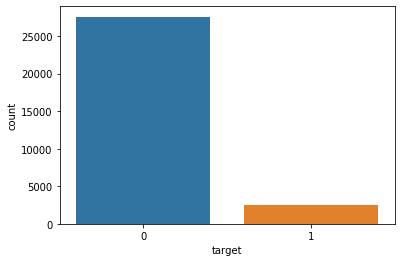

In [40]:
#target (chrun label) countplot  - Univariate
sns.countplot(x='target', data=hvc_df)
plt.show()

Observation:
As we observed earlier, churn rate is low in the overall dataset. So we would need to handle the class imbalance.

#### Age on Network (aon) 

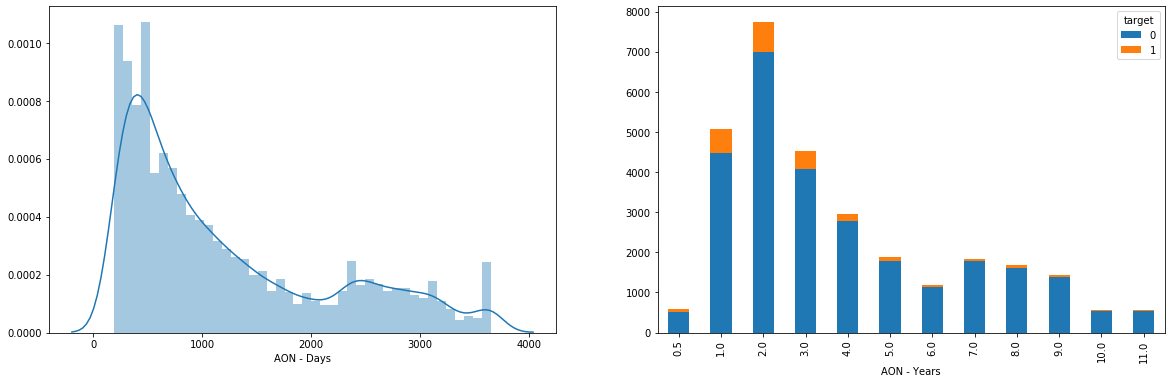

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(hvc_df['aon'], ax=ax1)
ax1.set_xlabel("AON - Days")

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((hvc_df['aon']/30)/12),1), bins = bins, labels = labels ), hvc_df['target']).plot(kind='bar', stacked=True, ax = ax2)
ax2.set_xlabel("AON - Years")
plt.show()

#### <u>Observation</u>: We could see more number of observations between 1 and 3 years. Also churn rate is high during this range than the others.

In [42]:
features_for_corr=['loc_ic_t2m_mou_8',
                   'av_rech_amt_data_8',
                  'last_day_rch_amt_8']

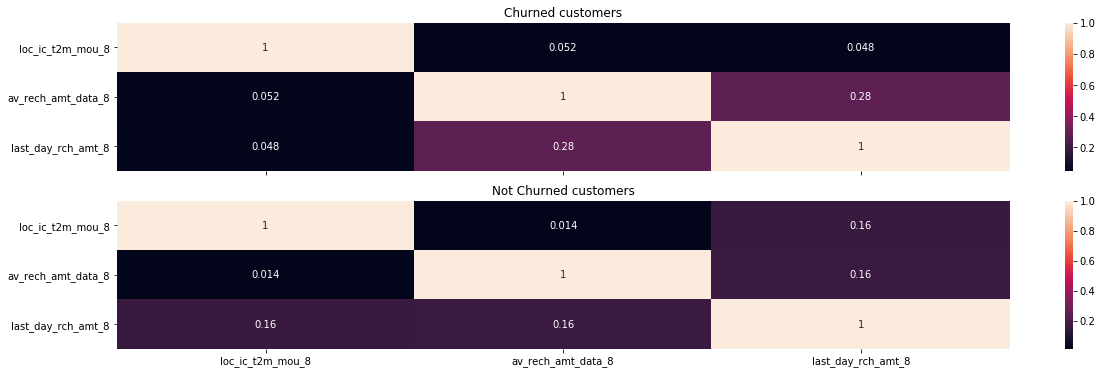

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20, 6),sharex=True)

sns.heatmap(hvc_df[hvc_df['target']==1][features_for_corr].corr(),ax=ax1,annot=True)

sns.heatmap(hvc_df[hvc_df['target']==0][features_for_corr].corr(),ax=ax2,annot=True)

ax1.title.set_text("Churned customers")

ax2.title.set_text("Not Churned customers")


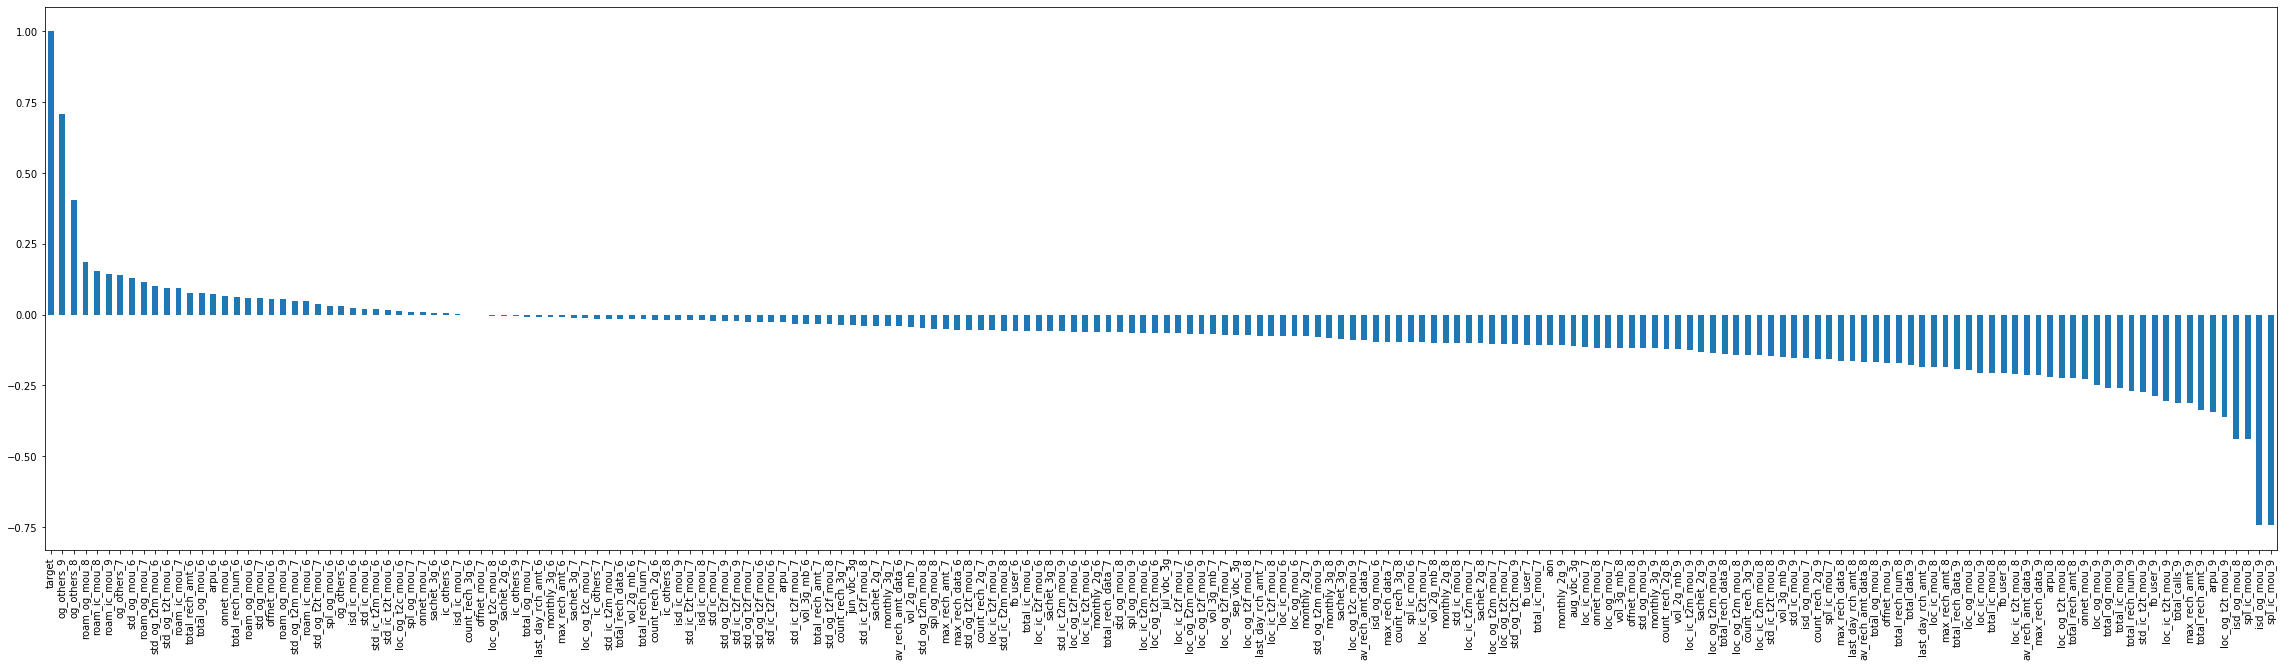

In [44]:
# lets check correlation of churn with other columns
plt.figure(figsize=(40,10))
hvc_df.corr()['target'].sort_values(ascending = False).plot(kind='bar')
plt.show()

#### <u>Observation</u>:
#### 1 Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
#### 2 Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

#### Incoming Calls Usage

,loc_ic_mou_6,std_ic_mou_6,isd_ic_mou_6,roam_ic_mou_6,spl_ic_mou_6,ic_others_6
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,220.797360,39.670053,7.004320,12.350262,-1.170922,0.622861
std,246.994777,73.262050,25.115828,39.023026,9.045675,2.180289
min,0.000000,-0.180553,0.000000,0.000000,-67.616350,0.000000
25%,52.660000,1.040000,0.000000,0.000000,0.000000,0.000000
50%,134.490000,11.410000,0.000000,0.000000,0.000000,0.000000
75%,297.155000,41.490000,0.000000,0.000000,0.000000,0.100000
max,1145.821000,391.305000,159.992400,215.642400,0.650000,14.080200


,loc_ic_mou_7,std_ic_mou_7,isd_ic_mou_7,roam_ic_mou_7,spl_ic_mou_7,ic_others_7
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,223.674268,41.293307,7.756431,7.959527,-1.136571,0.783021
std,247.792179,76.174109,26.924762,27.343424,8.550468,2.690976
min,0.000000,0.000000,0.000000,0.000000,-64.483016,0.000000
25%,55.777854,1.050000,0.000000,0.000000,0.000000,0.000000
50%,137.600000,12.090000,0.000000,0.000000,0.000000,0.000000
75%,298.732500,43.840000,0.000000,0.000000,0.000000,0.050000
max,1159.738600,409.711600,169.560000,150.581000,0.630000,16.580200


,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,roam_ic_mou_8,spl_ic_mou_8,ic_others_8
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,214.447524,37.287527,7.371915,8.972134,-2.452154,0.699572
std,244.324199,72.159598,26.033698,28.372658,12.281636,2.419528
min,0.000000,-0.114337,0.000000,0.000000,-63.295113,0.000000
25%,51.815000,0.410000,0.000000,0.000000,0.000000,0.000000
50%,128.750000,9.305000,0.000000,0.000000,0.000000,0.000000
75%,285.440000,38.380000,0.030000,0.000000,0.000000,0.130000
max,1124.464400,395.512000,170.347000,157.866400,0.680000,15.780000


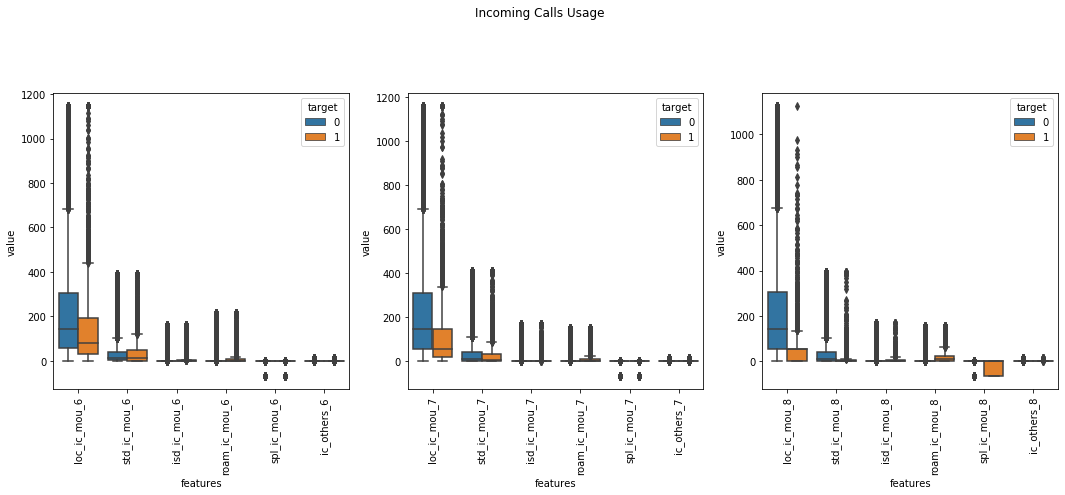

In [45]:
cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8']]

# column description stats
for i in range(0,3):
    display(hvc_df[cols[i]].describe())

# plot for the incoming calls usage
plt.figure(figsize=(18, 12))
for i in range(0,3):
    plt.subplot(2,3,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Incoming Calls Usage')

#### <u>Observation</u>:

#### 1 .Local calls - within same telecom circle seems to be the highest contributor in the overall incoming calls.

#### 2 .The incoming call seems to have dropped in the 8th month for customers who have churned

#### Outgoing Calls Usage

,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,roam_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,235.203440,323.166690,-1.934142,19.119757,5.092326,0.561634,581.965342
std,283.049211,494.494175,16.179360,56.780412,9.978415,1.396090,578.240730
min,-2.835049,0.000000,-120.448765,0.000000,0.000000,0.000000,0.000000
25%,32.330000,0.860000,0.000000,0.000000,0.000000,0.000000,116.800000
50%,124.550000,56.650000,0.000000,0.000000,0.410000,0.000000,410.670000
75%,332.142500,465.427500,0.000000,0.000000,5.197500,0.000000,858.705000
max,1144.612000,1834.783000,7.531600,281.115400,50.190800,6.830200,2207.893400


,loc_og_mou_7,std_og_mou_7,isd_og_mou_7,roam_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,236.023982,337.598106,-1.661326,13.306591,6.275403,0.001095,598.463125
std,280.506052,513.710213,14.376075,42.696781,11.676091,0.007147,594.946731
min,-22.130830,0.000000,-107.729302,0.000000,0.000000,0.000000,0.000000
25%,34.517500,0.615000,0.000000,0.000000,0.000000,0.000000,116.590000
50%,127.900000,55.635000,0.000000,0.000000,0.910000,0.000000,425.870000
75%,333.482500,499.282500,0.000000,0.000000,6.940000,0.000000,891.440000
max,1125.187600,1888.581600,7.950000,215.685000,59.881000,0.047816,2270.120000


,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,roam_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,217.799945,286.438079,-3.879285,14.514750,5.865045,0.001315,523.867215
std,272.886665,476.385672,20.218523,42.216613,11.052278,0.006070,572.869516
min,-25.332251,0.000000,-103.927808,0.000000,0.000000,0.000000,0.000000
25%,22.540000,0.060000,0.000000,0.000000,0.000000,0.000000,72.510000
50%,110.900000,41.720000,0.000000,0.000000,0.880000,0.000000,333.640000
75%,310.680000,357.237500,0.000000,0.000000,6.150000,0.000000,774.745000
max,1101.287600,1894.117000,6.400200,214.512600,59.081600,0.029390,2249.696000


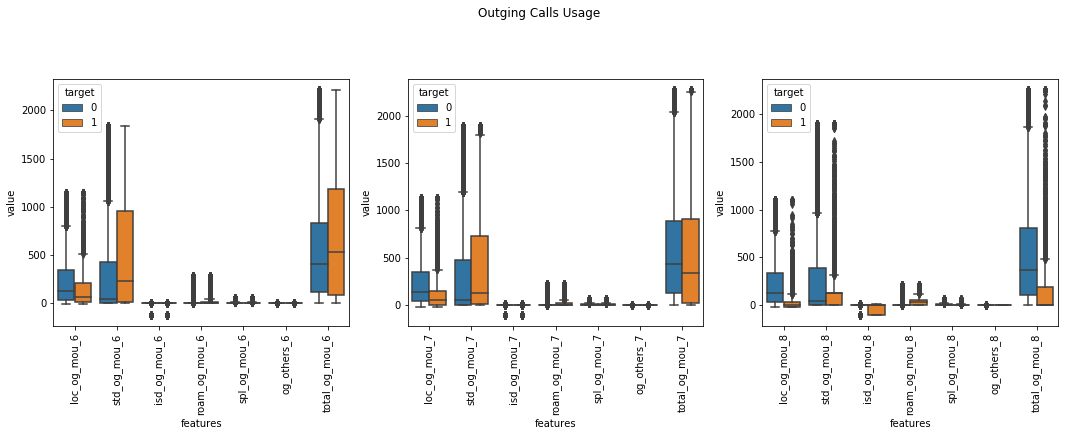

In [46]:
cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]
# column description stats
for i in range(0,3):
    display(hvc_df[cols[i]].describe())

# plot for the incoming calls usage
plt.figure(figsize=(18, 10))
for i in range(0,3):
    plt.subplot(2,3,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Outging Calls Usage')

#### <u>Observation</u>:

#### 1 .STD calls - outside the calling circle seems to be the highest contributor in the overall outgoing calls.

#### 2 .The outgoing call seems to have dropped in the 8th month

#### Operatorwise Calls Usage

,onnet_mou_6,offnet_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,236.945495,353.377027,56.174226,143.285395,13.588561,10.302852,24.475437,1.878176
std,352.329534,376.933007,88.927451,163.875291,28.505278,25.411478,47.997505,6.224855
min,-96.848812,0.000000,-58.891176,0.000000,0.000000,-23.054593,0.000000,0.000000
25%,17.090000,80.830000,6.090000,31.482500,0.000000,0.000000,0.000000,0.000000
50%,84.650000,222.570000,25.080000,89.370000,2.160000,0.380000,5.730000,0.000000
75%,290.362500,487.970000,67.430000,188.737500,12.075276,8.190000,23.597500,0.300000
max,1410.511400,1517.047400,477.003000,752.214600,160.490400,137.395000,262.240800,40.130200


,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,67.192416,152.009903,5.188889,1.346911,145.886630,158.750363,1.105207
std,115.004613,183.978250,11.084857,3.654676,297.170088,292.887911,4.097124
min,-99.843616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.380000,21.915000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.335000,83.250000,0.230000,0.000000,4.170000,20.060000,0.000000
75%,77.980000,208.930000,4.230000,0.130000,109.625000,154.537500,0.000000
max,537.691800,735.893800,53.631000,19.990400,1195.322000,1209.334200,24.840000


,onnet_mou_7,offnet_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,243.504959,355.592251,56.546508,144.587825,14.232146,10.876727,25.412033,1.966357
std,366.330821,382.141536,88.614589,162.764089,30.176289,26.838337,49.830924,6.433937
min,-83.831774,0.000000,-63.910852,0.000000,0.000000,-23.202032,0.000000,0.000000
25%,16.040000,78.532500,6.780000,34.230000,0.000000,0.000000,0.000000,0.000000
50%,82.860000,220.155000,25.780000,91.020000,2.360000,0.450000,5.940000,0.000000
75%,290.452500,494.005000,68.692500,190.660000,12.605242,8.590000,24.955000,0.360000
max,1463.311600,1524.160600,474.066000,750.689200,171.140400,146.592000,275.211000,41.440800


,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,66.904192,152.659332,5.291044,1.482414,154.353288,165.229605,1.062920
std,114.316136,182.119866,11.246319,4.202923,313.857873,305.375864,3.936875
min,-117.322170,0.000000,0.000000,-3.079384,0.000000,0.000000,0.000000
25%,4.610000,23.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.680000,84.510000,0.280000,0.000000,4.050000,19.900000,0.000000
75%,78.380000,208.455000,4.390000,0.100000,116.752500,160.380000,0.000000
max,526.647400,721.561000,54.591000,23.140400,1262.640000,1247.404000,24.030000


,onnet_mou_8,offnet_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,209.598848,318.278040,51.589478,142.173099,13.080254,9.229470,23.606260,1.809918
std,342.563104,359.984264,86.563081,162.710543,26.936161,25.952526,47.343008,5.815068
min,-84.896800,0.000000,-64.711812,0.000000,0.000000,-23.397423,0.000000,0.000000
25%,10.440000,63.195000,4.880000,31.410000,0.000000,0.000000,0.000000,0.000000
50%,65.660000,182.880000,22.620000,91.835000,2.410000,0.110000,5.290000,0.000000
75%,239.955000,438.920000,65.110000,185.782500,11.752761,7.040000,21.830000,0.510000
max,1452.734200,1495.840400,456.047800,749.539200,153.513400,144.061400,269.914000,37.612600


,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8
count,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000,30014.000000
mean,59.039749,144.520385,4.997298,1.529037,130.589701,139.523248,0.985605
std,111.727643,177.736016,10.726824,4.125191,287.216671,272.831197,3.671743
min,-120.800051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.540000,19.130000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.730000,81.630000,0.280000,0.000000,2.530000,15.540000,0.000000
75%,72.090000,197.040000,3.930000,0.480000,78.220000,117.780000,0.000000
max,511.301400,724.233200,53.290400,24.060000,1250.960400,1201.861600,22.960400


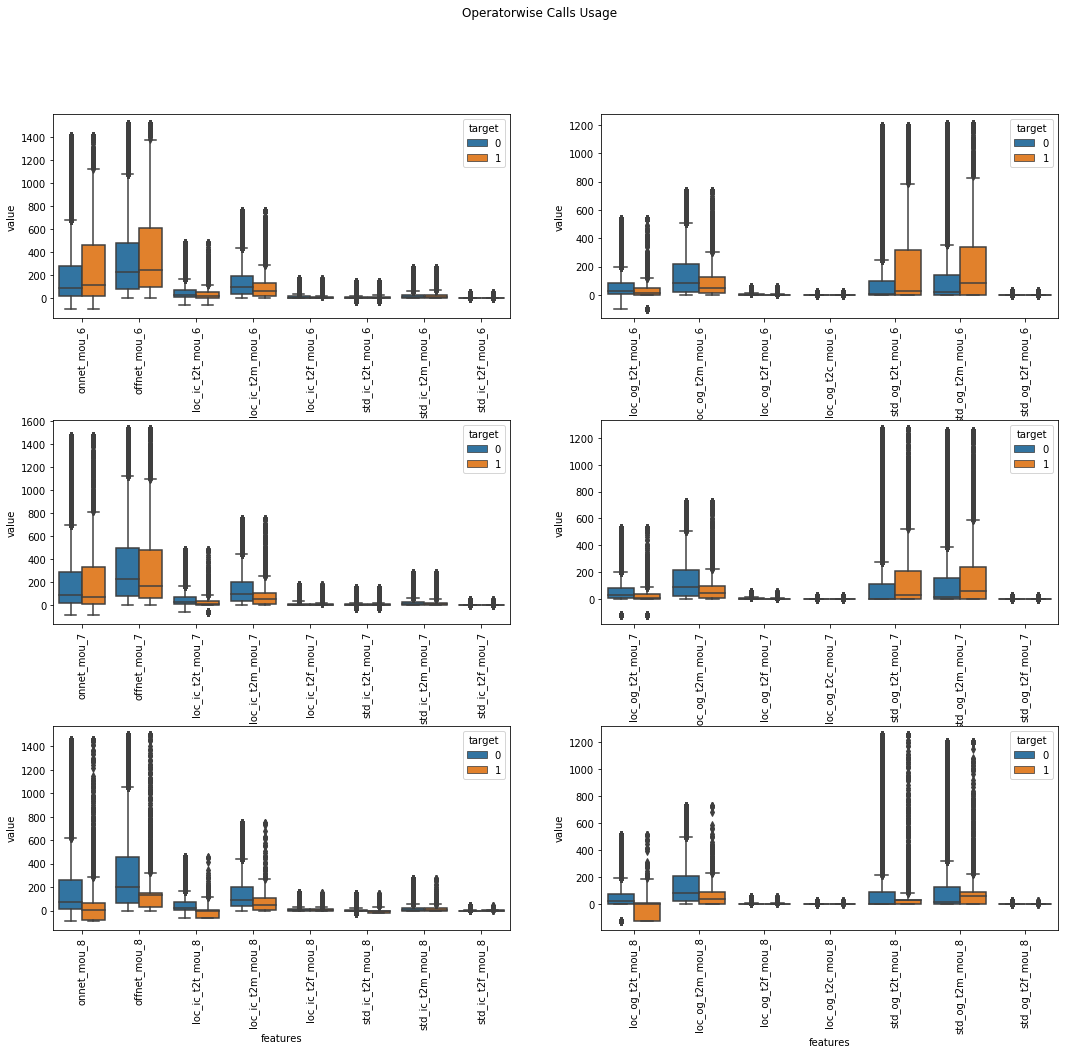

In [47]:
cols = [['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6'
         ,'std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6',
         'std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7'
         ,'std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7',
         'std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8'
         ,'std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8',
         'std_og_t2m_mou_8','std_og_t2f_mou_8']]

# column description stats
for i in range(0,6):
    display(hvc_df[cols[i]].describe())

# plot for the incoming calls usage
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(0,6):
    plt.subplot(3,2,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Operatorwise Calls Usage')


#### <u>Observation</u>:

#### 1 . All kind of calls outside the operator T network seems to be the highest contributor in the Operatorwise Calls Usage.

#### 2 . STD calls - outside the calling circle seems to be the highest contributor in the Operatorwise Calls Usage.

#### 3. The calls seems to have dropped in the 8th month for customers who have churned

#### Recharge Amount

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,30014.000000,30014.000000,30014.000000
mean,634.905711,635.307656,559.942160
std,388.650260,399.492637,423.526352
min,0.000000,0.000000,0.000000
25%,360.000000,352.000000,250.000000
50%,566.000000,562.000000,490.000000
75%,833.000000,831.000000,776.000000
max,1683.020000,1728.000000,1721.000000


,total_rech_amt_voice_6,total_rech_amt_voice_7,total_rech_amt_voice_8
count,30014.000000,30014.000000,30014.000000
mean,633.364130,633.577364,558.441827
std,389.074089,399.931325,423.541632
min,0.000000,0.000000,0.000000
25%,360.000000,350.000000,250.000000
50%,565.000000,560.000000,490.000000
75%,832.000000,830.000000,774.750000
max,1683.020000,1728.000000,1721.000000


,total_rech_data_6,total_rech_data_7,total_rech_data_8
count,30014.000000,30014.000000,30014.000000
mean,1.546978,1.736823,1.509129
std,2.246091,2.509172,2.353388
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,9.000000,10.000000,10.000000


,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,30014.000000,30014.000000,30014.000000
mean,159.204305,160.800660,151.337143
std,119.608906,120.089026,120.290016
min,0.000000,0.000000,0.000000
25%,110.000000,110.000000,50.000000
50%,120.000000,128.000000,130.000000
75%,200.000000,200.000000,198.000000
max,550.000000,550.000000,550.000000


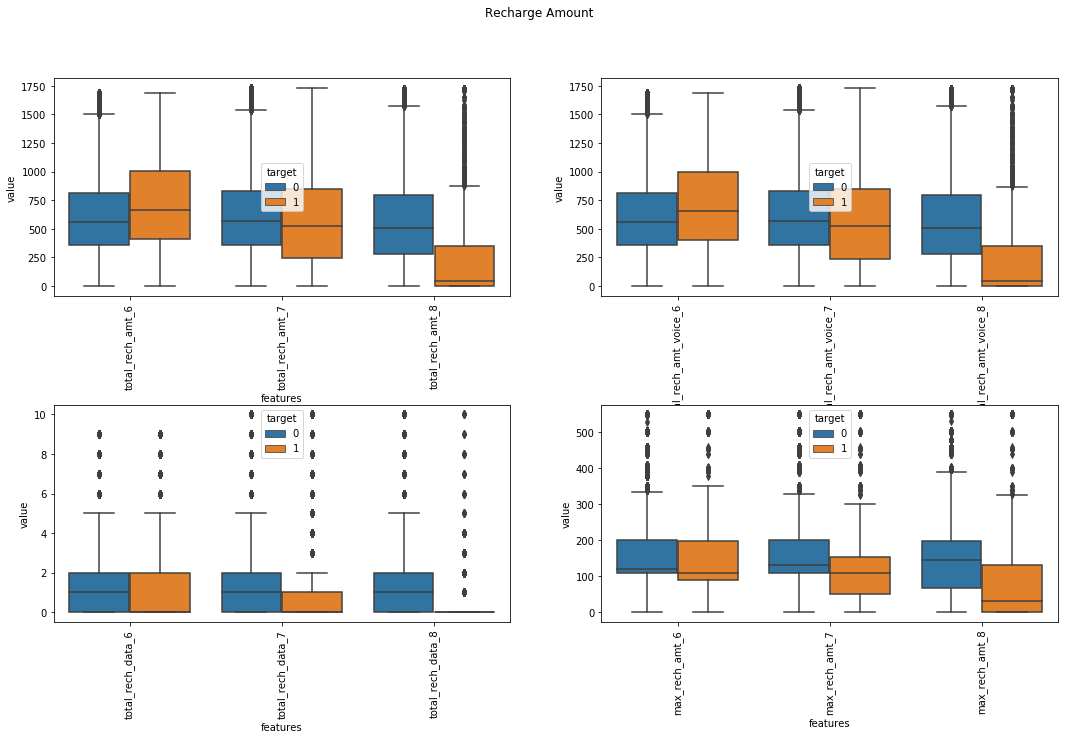

In [48]:
# Let's derive total recharge amount for voice with the diff recharge amount of total and data
hvc_df['total_rech_amt_voice_6'] = np.where((hvc_df['total_rech_amt_6'] >= hvc_df['total_rech_data_6']), 
                                              (hvc_df['total_rech_amt_6'] - hvc_df['total_rech_data_6']), 0)
hvc_df['total_rech_amt_voice_7'] = np.where((hvc_df['total_rech_amt_7'] >= hvc_df['total_rech_data_7']), 
                                              (hvc_df['total_rech_amt_7'] - hvc_df['total_rech_data_7']), 0)
hvc_df['total_rech_amt_voice_8'] = np.where((hvc_df['total_rech_amt_8'] >= hvc_df['total_rech_data_8']), 
                                              (hvc_df['total_rech_amt_8'] - hvc_df['total_rech_data_8']), 0)

cols = [
        ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],
        ['total_rech_amt_voice_6','total_rech_amt_voice_7','total_rech_amt_voice_8'],
        ['total_rech_data_6','total_rech_data_7','total_rech_data_8'],
        ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8']
       ]

# column description stats
for i in range(0,4):
    display(hvc_df[cols[i]].describe())

# plot for the recharge amount columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Amount')

#### <u>Observation</u>:

#### 1 . Amount in local currency for voice recharge seems to be the highest contributor in the overall recharge.

#### 2 .The recharge seems to have dropped in the 8th month for customers who are churned

#### Recharge Count

In [49]:
hvc_df.drop(['total_rech_amt_voice_8','total_rech_amt_voice_6','total_rech_amt_voice_7'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,30014.000000,30014.000000,30014.000000
mean,11.489305,11.350170,9.675851
std,7.716748,7.843868,7.908654
min,0.000000,0.000000,0.000000
25%,6.000000,6.000000,4.000000
50%,9.000000,9.000000,8.000000
75%,15.000000,15.000000,13.000000
max,35.000000,35.000000,35.000000


,total_rech_data_6,total_rech_data_7,total_rech_data_8
count,30014.000000,30014.000000,30014.000000
mean,1.546978,1.736823,1.509129
std,2.246091,2.509172,2.353388
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,9.000000,10.000000,10.000000


,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,30014.000000,30014.000000,30014.000000
mean,72.484840,74.152162,67.298761
std,90.692135,91.538956,89.901346
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,25.000000,25.000000,23.000000
75%,154.000000,154.000000,154.000000
max,252.000000,252.000000,252.000000


,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8
count,30014.000000,30014.000000,30014.000000
mean,1.132205,1.297994,1.094489
std,2.009120,2.267553,2.001915
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,8.000000,9.000000,8.000000


,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,30014.000000,30014.000000,30014.000000
mean,0.362331,0.375491,0.336443
std,0.730655,0.755398,0.723735
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000


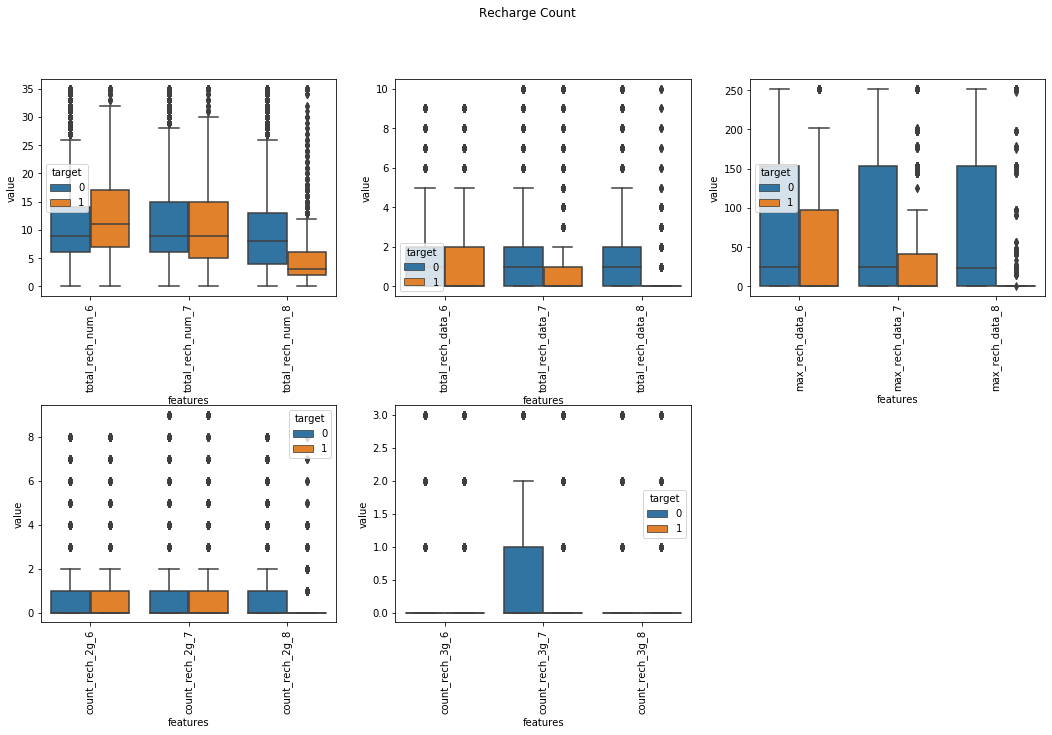

In [50]:
cols = [
        ['total_rech_num_6','total_rech_num_7','total_rech_num_8'],
        ['total_rech_data_6','total_rech_data_7','total_rech_data_8'],
        ['max_rech_data_6','max_rech_data_7','max_rech_data_8'],
        ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'],
        ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'] 
       ]

# column description stats
for i in range(0,5):
    display(hvc_df[cols[i]].describe())

# plot for the recharge count columns
plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)
for i in range(0,5):
    plt.subplot(2,3,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Recharge Count')

#### <u>Observation</u>:

#### 1 The no. of recharge seems to have dropped in the 8th month for customers who have churned

#### Average Revenue per User (Arpu)

,arpu_6,arpu_7,arpu_8
count,30014.000000,30014.000000,30014.000000
mean,537.942294,540.343889,488.358890
std,323.384968,325.681173,351.525129
min,0.000000,0.000000,0.000000
25%,309.868000,309.902000,231.605750
50%,481.585000,480.944000,427.584500
75%,699.817750,698.280000,661.438500
max,1410.792540,1428.685880,1455.539960


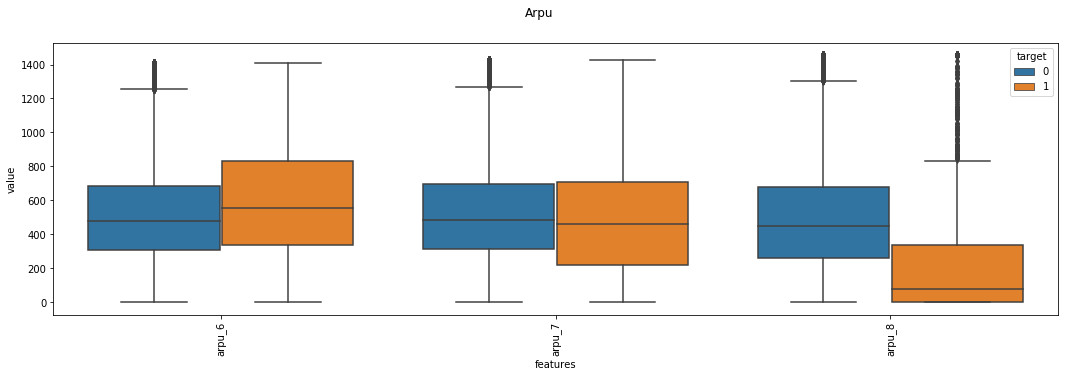

In [51]:
cols = [
        ['arpu_6','arpu_7','arpu_8'],
       ]

# column description stats
for i in range(0,1):
    display(hvc_df[cols[i]].describe())

# plot for the arpu
plt.figure(figsize=(18, 5))
for i in range(0,1):
    plt.subplot(1,1,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Arpu')

#### <u>Observation</u>:
#### 1 The arpu seems to have dropped in the 8th month for customers who have churned.

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
count,30014.000000,30014.000000,30014.000000
mean,110.428543,107.851629,91.036930
std,231.974860,228.257588,211.027802
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.040000,0.000000
75%,83.375000,77.722500,51.680000
max,1005.491000,993.172000,983.512200


,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,30014.000000,30014.000000,30014.000000
mean,290.990198,314.873121,299.642853
std,554.284271,579.807709,579.570405
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,357.477500,410.565000,356.150000
max,2176.454200,2254.582800,2354.231200


,fb_user_6,fb_user_7,fb_user_8
count,30014.000000,30014.000000,30014.000000
mean,0.075332,0.092390,0.008529
std,0.976393,0.973113,0.972240
min,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


,monthly_2g_6,monthly_2g_7,monthly_2g_8
count,30014.000000,30014.000000,30014.000000
mean,0.153562,0.158659,0.138235
std,0.360534,0.365364,0.345153
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,30014.000000,30014.000000,30014.000000
mean,0.196009,0.203172,0.188545
std,0.489311,0.505231,0.487064
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000


,sachet_2g_6,sachet_2g_7,sachet_2g_8
count,30014.000000,30014.000000,30014.000000
mean,0.958919,1.082362,0.942260
std,2.011730,2.165283,1.998675
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,8.000000,8.000000,8.000000


,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,30014.000000,30014.000000,30014.000000
mean,0.142667,0.145299,0.122076
std,0.438429,0.449397,0.417151
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000


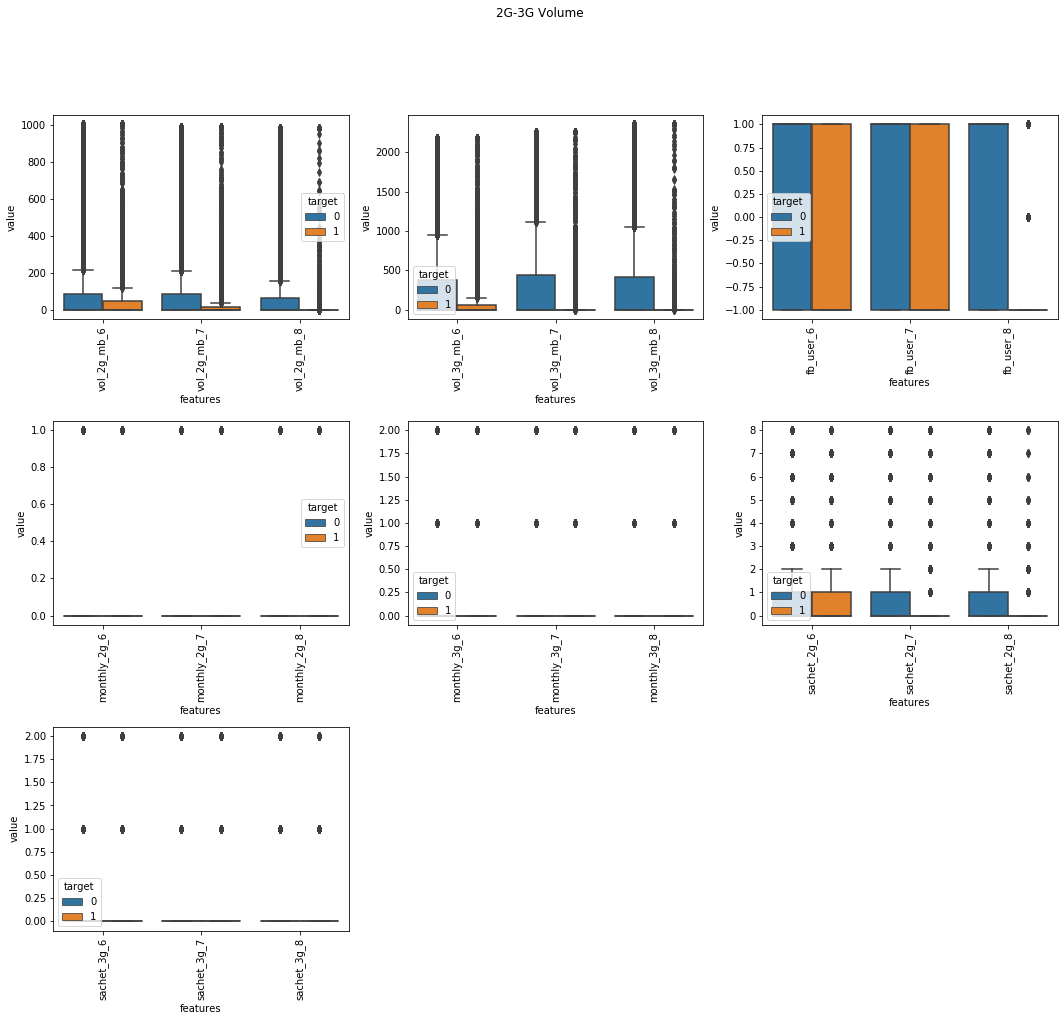

In [52]:
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['fb_user_6','fb_user_7','fb_user_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
       ]#### 2G and 3G


# column description stats
for i in range(0,7):
    display(hvc_df[cols[i]].describe())

# plot for the 2G-3G
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(0,7):
    plt.subplot(3,3,i+1)
    X = pd.concat([hvc_df[cols[i]], hvc_df['target']], axis=1)
    X = pd.melt(X,id_vars="target",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="target", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('2G-3G Volume')

#### <u>Observation</u>:

#### 1 .The Mobile internet usage volume of 2G (in MB) seems to have dropped in the 8th month for customers who have churned.

#### 2 .The Mobile internet usage volume of 3G (in MB) seems to have dropped in the 8th month for customers who have churned.

#### 3. Service scheme to avail services of Facebook and similar social networking sites seems to have dropped in the 8th month for customers who have churned.

#### 4. Service schemes with validity equivalent to a month are very low in 6th, 7th and 8th month

#### 5 .Service schemes with validity smaller than a month are very low in 6th, 7th and 8th month

# 5 Deriving Some Features

In [53]:
#deriving some features

#1 Average Features

# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = hvc_df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (hvc_df.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    hvc_df[avg_col_name] = (hvc_df[col_6]  + hvc_df[col_7])/ 2

(30014, 192)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:

#2 Gradient Features

# a very good approach can be to calculate the drop in usage in 8th month (action phase) as compared to the 6 - 7th month (good phase)

#drop in revenue
hvc_df['arpu_drop']=(hvc_df['arpu_6']+hvc_df['arpu_7'])/2 - hvc_df['arpu_8']

#drop in local ic , og calls

hvc_df['local_ic_drop']=(hvc_df['loc_ic_mou_6']+hvc_df['loc_ic_mou_7'])/2-hvc_df['loc_ic_mou_8']
hvc_df['local_og_drop']=(hvc_df['loc_og_mou_6']+hvc_df['loc_og_mou_7'])/2-hvc_df['loc_og_mou_8']

#drop in std ic , og calls
hvc_df['std_ic_drop']=(hvc_df['std_ic_mou_6']+hvc_df['std_ic_mou_7'])/2-hvc_df['std_ic_mou_8']
hvc_df['std_og_drop']=(hvc_df['std_og_mou_6']+hvc_df['std_og_mou_7'])/2-hvc_df['std_og_mou_8']

#drop in isd ic,og calls
hvc_df['isd_ic_drop']=(hvc_df['isd_ic_mou_6']+hvc_df['isd_ic_mou_7'])/2-hvc_df['isd_ic_mou_8']
hvc_df['isd_og_drop']=(hvc_df['isd_og_mou_6']+hvc_df['isd_og_mou_7'])/2-hvc_df['isd_og_mou_8']

#drop in roam ic,og calls
hvc_df['roam_ic_drop']=(hvc_df['roam_ic_mou_6']+hvc_df['roam_ic_mou_7'])/2-hvc_df['roam_ic_mou_8']
hvc_df['roam_og_drop']=(hvc_df['roam_og_mou_6']+hvc_df['roam_og_mou_7'])/2-hvc_df['roam_og_mou_8']

#drop in total ic,og calls
hvc_df['total_ic_drop']=(hvc_df['total_ic_mou_6']+hvc_df['total_ic_mou_7'])/2-hvc_df['total_ic_mou_8']
hvc_df['total_og_drop']=(hvc_df['total_og_mou_6']+hvc_df['total_og_mou_7'])/2-hvc_df['total_og_mou_8']

#drop in total rech
hvc_df['total_rech_amt_drop']=(hvc_df['total_rech_amt_6']+hvc_df['total_rech_amt_7'])/2-hvc_df['total_rech_amt_8']
hvc_df['total_rech_num_drop']=(hvc_df['total_rech_num_6']+hvc_df['total_rech_num_7'])/2-hvc_df['total_rech_num_8']
hvc_df['total_rech_data_drop']=(hvc_df['total_rech_data_6']+hvc_df['total_rech_data_7'])/2-hvc_df['total_rech_data_8']

#drop in avg and max rech amt

hvc_df['av_rech_amt_data_drop']=(hvc_df['av_rech_amt_data_6']+hvc_df['av_rech_amt_data_7'])/2-hvc_df['av_rech_amt_data_8']
hvc_df['max_rech_amt_drop']=(hvc_df['max_rech_amt_6']+hvc_df['max_rech_amt_7'])/2-hvc_df['max_rech_amt_8']

#drop in data consumption 2g,3g
hvc_df['vol_2g_mb_drop']=(hvc_df['vol_2g_mb_6']+hvc_df['vol_2g_mb_7'])/2-hvc_df['vol_2g_mb_8']
hvc_df['vol_3g_mb_drop']=(hvc_df['vol_3g_mb_6']+hvc_df['vol_3g_mb_7'])/2-hvc_df['vol_3g_mb_8']




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [55]:
# dropping all the original columns
cols_to_drop_67=hvc_df.filter(regex='_6|_7').columns
hvc_df.drop(cols_to_drop_67, axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
hvc_df.shape

(30014, 164)

In [57]:
# dropping all the columns related to 9th month

cols_to_drop=[col for col in hvc_df.columns if '9' in col]

In [58]:
cols_to_drop.append('sep_vbc_3g')

In [59]:
len(cols_to_drop)

49

In [60]:
hvc_df.drop(cols_to_drop,axis=1,inplace=True)

In [61]:
hvc_df.shape

(30014, 115)

# 6 Interpretabe Modeling RFE + LogisticRegression

In [62]:
# creating a dataframe to hold the values
Results_df=pd.DataFrame(columns=['Model Name','Accuracy','Sensitivity','Specificity','F1 Score'])

In [63]:
X = hvc_df.drop("target", axis = 1)
y = hvc_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [64]:
# since we are dealing with imbalanced classes we need to apply Over sampling technique
from imblearn.over_sampling import SMOTE 
Smo = SMOTE(random_state=101)
X_train, y_train = Smo.fit_sample(X_train,y_train)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 20 most imp features for us
rfe = RFE(lr, 20)   
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

In [66]:
# implement Stats model api here

In [67]:
rfe_features = list(X_train.columns[rfe.support_])
print("20 most important features selected by RFE ")
for i in rfe_features:
    print(i)

20 most important features selected by RFE 
roam_og_mou_8
loc_og_t2c_mou_8
std_og_t2f_mou_8
loc_ic_t2t_mou_8
loc_ic_t2m_mou_8
loc_ic_t2f_mou_8
spl_ic_mou_8
last_day_rch_amt_8
total_rech_data_8
max_rech_data_8
count_rech_2g_8
sachet_2g_8
fb_user_8
avg_loc_og_t2c_mou_av67
avg_loc_ic_t2t_mou_av67
avg_std_ic_t2f_mou_av67
avg_spl_ic_mou_av67
avg_count_rech_3g_av67
total_rech_num_drop
total_rech_data_drop


In [68]:
# implement Stats model api here
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [69]:
X_train=X_train[rfe_features]

In [70]:
#fitting the model
log_reg=sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.370216
         Iterations 7


In [71]:
#checking the summary
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                41358
Model:                          Logit   Df Residuals:                    41338
Method:                           MLE   Df Model:                           19
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.4659
Time:                        21:05:04   Log-Likelihood:                -15311.
converged:                       True   LL-Null:                       -28667.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
roam_og_mou_8               0.0094      0.000     31.111      0.000       0.009       0.010
loc_og_t2c_mou_8            0.0094      0.004      2.196      0.028       0.001       0.018
std_og_t2f_mou_8           -0.0633      0.008     -8.012      0.000      -0.079      -0.048
loc_ic_t2t_mou_8           -0.0096      0.001    -17.958      0.000      -0.011      -0.009
loc_ic_t2m_mou_8           -0.0054      0.000    -25.324      0.000      -0.006      -0.005
loc_ic_t2f_mou_8           -0.0111      0.001     -9.142      0.000      -0.014      -0.009
spl_ic_mou_8               -0.0372      0.002    -23.433      0.000      -0.040      -0.034
last_day_rch_amt_8         -0.0057      0.000    -27.410      0.000      -0.006      -0.005
total_rech_data_8          -0.1547      0.030     -5.077      0.000      -0.214      -0.095
max_rech_data_8            -0.0044      0.000    -12.050      0.000      -0.005      -0.004
count_rech_2g_8            -0.6443      0.081     -7.970      0.000      -0.803      -0.486
sachet_2g_8                 0.6404      0.082      7.808      0.000       0.480       0.801
fb_user_8                  -0.2394      0.025     -9.642      0.000      -0.288      -0.191
avg_loc_og_t2c_mou_av67    -0.0124      0.005     -2.413      0.016      -0.023      -0.002
avg_loc_ic_t2t_mou_av67     0.0058      0.000     14.929      0.000       0.005       0.007
avg_std_ic_t2f_mou_av67     0.0200      0.004      5.382      0.000       0.013       0.027
avg_spl_ic_mou_av67        -0.0265      0.002    -12.618      0.000      -0.031      -0.022
avg_count_rech_3g_av67      0.2645      0.034      7.736      0.000       0.198       0.332
total_rech_num_drop         0.1056      0.003     36.243      0.000       0.100       0.111
total_rech_data_drop       -0.0059      0.010     -0.574      0.566      -0.026       0.014
===========================================================================================
"""

In [72]:
# calculating VIF
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(len(X_train.columns))] 
  
print(vif_data.sort_values(by='VIF',ascending=False))

                    feature        VIF
10          count_rech_2g_8  46.164346
11              sachet_2g_8  45.803084
8         total_rech_data_8  16.060303
9           max_rech_data_8   4.344394
3          loc_ic_t2t_mou_8   3.879440
14  avg_loc_ic_t2t_mou_av67   3.433802
12                fb_user_8   3.173666
6              spl_ic_mou_8   2.798237
17   avg_count_rech_3g_av67   2.525903
4          loc_ic_t2m_mou_8   2.360444
18      total_rech_num_drop   1.938155
7        last_day_rch_amt_8   1.891715
19     total_rech_data_drop   1.673106
16      avg_spl_ic_mou_av67   1.557633
5          loc_ic_t2f_mou_8   1.510304
13  avg_loc_og_t2c_mou_av67   1.441288
1          loc_og_t2c_mou_8   1.406765
0             roam_og_mou_8   1.386810
15  avg_std_ic_t2f_mou_av67   1.313311
2          std_og_t2f_mou_8   1.244248


In [73]:
# dropping 'count_rech_2g_8' due to high vif
rfe_features.pop(rfe_features.index('count_rech_2g_8'))

'count_rech_2g_8'

In [74]:
# fitting the model again
X_train=X_train[rfe_features]
log_reg2=sm.Logit(y_train,X_train).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.371056
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41358
Model:                          Logit   Df Residuals:                    41339
Method:                           MLE   Df Model:                           18
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.4647
Time:                        21:05:05   Log-Likelihood:                -15346.
converged:                       True   LL-Null:                       -28667.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
roam_og_mou_8               0.0094      0.000     31.063      0.000       0.009   

In [75]:
# calculating VIF
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(len(X_train.columns))] 
  
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
8,total_rech_data_8,15.366650
10,sachet_2g_8,11.519935
9,max_rech_data_8,3.944443
3,loc_ic_t2t_mou_8,3.879403
13,avg_loc_ic_t2t_mou_av67,3.432465
11,fb_user_8,3.165937
6,spl_ic_mou_8,2.798152
4,loc_ic_t2m_mou_8,2.355171
16,avg_count_rech_3g_av67,2.256723
17,total_rech_num_drop,1.937429


In [76]:
#dropping total_rech_data_8 due to high vif
rfe_features.pop(rfe_features.index('total_rech_data_8'))

'total_rech_data_8'

In [77]:
# fitting the model again
X_train=X_train[rfe_features]
log_reg3=sm.Logit(y_train,X_train).fit()
print(log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.371627
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41358
Model:                          Logit   Df Residuals:                    41340
Method:                           MLE   Df Model:                           17
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.4639
Time:                        21:05:05   Log-Likelihood:                -15370.
converged:                       True   LL-Null:                       -28667.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
roam_og_mou_8               0.0094      0.000     31.059      0.000       0.009   

In [78]:
# calculating VIF
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(len(X_train.columns))] 
  
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
3,loc_ic_t2t_mou_8,3.878423
8,max_rech_data_8,3.488831
12,avg_loc_ic_t2t_mou_av67,3.430961
10,fb_user_8,3.141911
6,spl_ic_mou_8,2.796120
4,loc_ic_t2m_mou_8,2.354745
16,total_rech_num_drop,1.933799
7,last_day_rch_amt_8,1.889791
15,avg_count_rech_3g_av67,1.787403
14,avg_spl_ic_mou_av67,1.550898


In [79]:
# vif looks good , but dropping 'total_rech_data_drop' due to high p value
rfe_features.pop(rfe_features.index('total_rech_data_drop'))

'total_rech_data_drop'

In [80]:
# fitting the model again
X_train=X_train[rfe_features]
log_reg4=sm.Logit(y_train,X_train).fit()
print(log_reg4.summary())

Optimization terminated successfully.
         Current function value: 0.371627
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41358
Model:                          Logit   Df Residuals:                    41341
Method:                           MLE   Df Model:                           16
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.4639
Time:                        21:05:06   Log-Likelihood:                -15370.
converged:                       True   LL-Null:                       -28667.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
roam_og_mou_8               0.0094      0.000     31.063      0.000       0.009   

In [81]:
# calculating VIF
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(len(X_train.columns))] 
  
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
3,loc_ic_t2t_mou_8,3.871738
8,max_rech_data_8,3.437439
12,avg_loc_ic_t2t_mou_av67,3.424265
10,fb_user_8,3.141897
6,spl_ic_mou_8,2.761590
4,loc_ic_t2m_mou_8,2.352093
7,last_day_rch_amt_8,1.888642
16,total_rech_num_drop,1.781798
15,avg_count_rech_3g_av67,1.609281
14,avg_spl_ic_mou_av67,1.547712


In [82]:
#----------------------------------------------------------------------#

In [83]:
y_pred=log_reg4.predict(X_test[rfe_features])

In [84]:
# assuming decision boundary of 0.5
y_pred=[1 if x >= 0.5 else 0 for x in y_pred]

In [85]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


[[5866 1027]
 [ 147  464]]
Sensitivity: 	0.76
Specificity: 	0.85


In [86]:
f1_score(y_test,y_pred)

0.44148430066603234

In [87]:
accuracy_score(y_test,y_pred)

0.8435501066098081

In [88]:
temp_result=pd.DataFrame(
{
    "Model Name":["Logistic Regression + RFE"],
    "Accuracy":[accuracy_score(y_test,y_pred)],
    "Sensitivity":[sensitivity],
    "Specificity":[specificity],
    "F1 Score":[f1_score(y_test,y_pred)]
})

In [89]:
Results_df=pd.concat([Results_df,temp_result],axis=0)

In [90]:
Results_df

,Model Name,Accuracy,Sensitivity,Specificity,F1 Score
0,Logistic Regression + RFE,0.84355,0.759411,0.851008,0.441484


In [91]:
#calculating the optimal Threshold
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
y_pred=log_reg4.predict(X_test[rfe_features])

num = [0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_pred_final=[1 if x >= i else 0 for x in y_pred]
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_final, average='binary')
    accuracy=accuracy_score(y_test,y_pred_final)
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081423  1.000000  0.000000
0.2   0.2  0.624733  0.895254  0.600754
0.3   0.3  0.729078  0.865794  0.716959
0.4   0.4  0.796509  0.818331  0.794574
0.5   0.5  0.843550  0.759411  0.851008
0.6   0.6  0.883129  0.718494  0.897722
0.7   0.7  0.913246  0.648118  0.936747
0.8   0.8  0.930437  0.538462  0.965182
0.9   0.9  0.935901  0.399345  0.983461


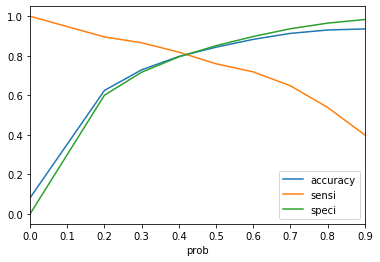

In [92]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### <u> Observation </u> : Looks like the ideal threshold is around 0.4

In [93]:
# recomputing accuracy metrics for logistic regression model with threshold 0.4
y_pred=log_reg4.predict(X_test[rfe_features])

y_pred=[1 if x >= 0.4 else 0 for x in y_pred]
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
accuracy=accuracy_score(y_test,y_pred_final)

temp_result=pd.DataFrame(
{
    "Model Name":["Logistic Regression + RFE + Threshold 0.4"],
    "Accuracy":[accuracy],
    "Sensitivity":[sensitivity],
    "Specificity":[specificity],
    "F1 Score":[f1_score(y_test,y_pred)]
})

Results_df=pd.concat([Results_df,temp_result],axis=0)

In [94]:
Results_df

,Model Name,Accuracy,Sensitivity,Specificity,F1 Score
0,Logistic Regression + RFE,0.843550,0.759411,0.851008,0.441484
0,Logistic Regression + RFE + Threshold 0.4,0.935901,0.818331,0.794574,0.395726


In [95]:
# train - test split # Again 
X = hvc_df.drop("target", axis = 1)
y = hvc_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4,stratify=y)

#### Applying SMOTE on training Set

In [96]:

Smo = SMOTE(random_state=101)
X_train, y_train = Smo.fit_sample(X_train,y_train)

# 7 Applying PCA

In [97]:
# creating a pipeline
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [98]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.85
1       25.37
2       32.69
3       38.28
4       42.97
5       46.80
6       50.12
7       53.21
8       55.80
9       58.33
10      60.64
11      62.73
12      64.71
13      66.55
14      68.36
15      70.08
16      71.73
17      73.24
18      74.65
19      75.98
20      77.29
21      78.54
22      79.70
23      80.79
24      81.84
25      82.86
26      83.81
27      84.72
28      85.55
29      86.33
30      87.07
31      87.79
32      88.47
33      89.15
34      89.77
35      90.39
36      90.99
37      91.56
38      92.07
39      92.56
40      93.02
41      93.46
42      93.87
43      94.26
44      94.63
45      95.00
46      95.35
47      95.69
48      96.01
49      96.29
50      96.57
51      96.84
52      97.10
53      97.33
54      97.55
55      97.77
56      97.97
57      98.16
58      98.33
59      98.50
60      98.66
61      98.81
62      98.96
63      99.09
64      99.20
65      99.30
66      99.38
67      99.45
68      99.52
69      99.56
70      99.61
71    

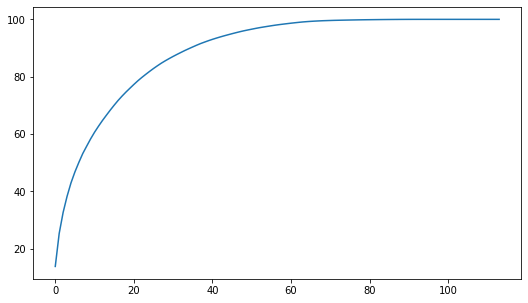

In [99]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

# 8 Modeling PCA + SVM + HyperParamTuning


In [100]:
PCA_VARS=40

steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=PCA_VARS)),
    ('svm',SVC())
]

pca_svm=Pipeline(steps)

param={ 
        "svm__kernel":['poly', 'rbf', 'sigmoid'],
        "svm__C":[50, 10, 1.0, 0.1, 0.01],
        "svm__gamma":['scale']
}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

model1 = GridSearchCV(estimator=pca_svm, cv=folds, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [101]:
model1.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=40)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [50, 10, 1.0, 0.1, 0.01],
                         'svm__gamma': ['scale'],
                         'svm__kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='roc_auc', verbose=1)

In [102]:
print("Best AUC: ", model1.best_score_)
print("Best hyperparameters: ", model1.best_params_)

Best AUC:  0.9870104608087095
Best hyperparameters:  {'svm__C': 50, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [103]:
y_pred = model1.best_estimator_.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[6515  378]
 [ 263  348]]
Sensitivity: 	0.57
Specificity: 	0.95


In [104]:
temp_result=pd.DataFrame(
{
    "Model Name":["PCA +SVM + Hyper Param Tuning"],
    "Accuracy":[accuracy_score(y_test,y_pred)],
    "Sensitivity":[sensitivity],
    "Specificity":[specificity],
    "F1 Score":[f1_score(y_test,y_pred)]
})

In [105]:
Results_df=pd.concat([Results_df,temp_result],axis=0)

In [106]:
Results_df

,Model Name,Accuracy,Sensitivity,Specificity,F1 Score
0,Logistic Regression + RFE,0.843550,0.759411,0.851008,0.441484
0,Logistic Regression + RFE + Threshold 0.4,0.935901,0.818331,0.794574,0.395726
0,PCA +SVM + Hyper Param Tuning,0.914579,0.569558,0.945162,0.520568


# 9 Modeling PCA + Logistic

In [107]:
PCA_VARS = 40


# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", PCA(n_components=PCA_VARS)),
         ("lr", LogisticRegression())
        ]

# compile pipeline
pca_lr = Pipeline(steps)

# hyperparameter space
params = {'lr__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'lr__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model2 = GridSearchCV(estimator=pca_lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [108]:
model2.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.91840704        nan 0.91836253        nan 0.9184104
        nan 0.91836241        nan 0.91838426        nan 0.9183803
        nan 0.91836109        nan 0.91839269]
  category=UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=40)),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'lr__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [109]:
print("Best AUC: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

Best AUC:  0.9184104010374161
Best hyperparameters:  {'lr__C': 1, 'lr__penalty': 'l2'}


In [110]:
y_pred=model2.best_estimator_.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


[[5931  962]
 [ 136  475]]
Sensitivity: 	0.78
Specificity: 	0.86


In [112]:
temp_result=pd.DataFrame(
{
    "Model Name":["PCA +Logistic + Hyper Param Tuning"],
    "Accuracy":[accuracy_score(y_test,y_pred)],
    "Sensitivity":[sensitivity],
    "Specificity":[specificity],
    "F1 Score":[f1_score(y_test,y_pred)]
})

In [113]:
Results_df=pd.concat([Results_df,temp_result])

In [114]:
Results_df

,Model Name,Accuracy,Sensitivity,Specificity,F1 Score
0,Logistic Regression + RFE,0.843550,0.759411,0.851008,0.441484
0,Logistic Regression + RFE + Threshold 0.4,0.935901,0.818331,0.794574,0.395726
0,PCA +SVM + Hyper Param Tuning,0.914579,0.569558,0.945162,0.520568
0,PCA +Logistic + Hyper Param Tuning,0.853678,0.777414,0.860438,0.463867


# 10 Modeling PCA + RFClassifier + Hyper Param Tuning

In [115]:
PCA_VARS = 40


# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", PCA(n_components=PCA_VARS)),
         ("rfc", RandomForestClassifier())
        ]

# compile pipeline
pca_rfc = Pipeline(steps)

# hyperparameter space
params = {"rfc__criterion": ['gini', 'entropy'], 
          "rfc__max_features": ['auto', 'sqrt','log2'],
          "rfc__n_estimators": [10,100,1000]
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model4 = GridSearchCV(estimator=pca_rfc, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [116]:
model4.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=40)),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_features': ['auto', 'sqrt', 'log2'],
                         'rfc__n_estimators': [10, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [117]:
print("Best AUC: ", model4.best_score_)
print("Best hyperparameters: ", model4.best_params_)

Best AUC:  0.9892844372360152
Best hyperparameters:  {'rfc__criterion': 'entropy', 'rfc__max_features': 'auto', 'rfc__n_estimators': 1000}


In [118]:
y_pred = model4.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
# y_pred_prob = model.predict_proba(X_test)[:, 1]
# print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6547  346]
 [ 240  371]]
Sensitivity: 	0.61
Specificity: 	0.95


In [119]:
temp_result=pd.DataFrame(
{
    "Model Name":["PCA +RandomForest + Hyper Param Tuning"],
    "Accuracy":[accuracy_score(y_test,y_pred)],
    "Sensitivity":[sensitivity],
    "Specificity":[specificity],
    "F1 Score":[f1_score(y_test,y_pred)] 
})

In [120]:
Results_df=pd.concat([Results_df,temp_result],axis=0)

In [121]:
Results_df

,Model Name,Accuracy,Sensitivity,Specificity,F1 Score
0,Logistic Regression + RFE,0.843550,0.759411,0.851008,0.441484
0,Logistic Regression + RFE + Threshold 0.4,0.935901,0.818331,0.794574,0.395726
0,PCA +SVM + Hyper Param Tuning,0.914579,0.569558,0.945162,0.520568
0,PCA +Logistic + Hyper Param Tuning,0.853678,0.777414,0.860438,0.463867
0,PCA +RandomForest + Hyper Param Tuning,0.921908,0.607201,0.949804,0.558735


#### <u>Model Selection</u>

#### We can select the the Logistic Regression model that used RFE along with a custom threshold of 0.4 ,  as it has descent values for sensitivity , specificity and accuracy . For our case/problem we should focus on maximizing the sensitivity (reducing False Negatives as we cannot tolerate False negatives because it may directly affect company's revenue)

#### Insights  & Recommendations :

#### 1 .   Lesser the amount of last day recharge higher the churn rate. Focus on the customers whose recharge amount has decreased. We can generate some sort of offer specially curated for them .

#### 2 .   Drop in the number of recharges (given by derived feature total_rech_num_drop) , indicates the customer is about to churn

#### 3 .  The Telecom compnay can roll out some surveys , and gather  the customer's concern and try to optimize the rates and services .

#### 4 . Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone  .


#### 5 . Incoming calls play a critical role , probably we can track the incoming calls are coming from which network and offer the same competitive package/ pricing as compared to that network  .


#### 6 . Special packs can be induced for the users  using social media websites such as FB (facebook) to create a sense affinity towards the company , there by mitigating churn .